# Circle Drawing Algorithms

 **Circle Equation**: 
   For any point (x, y) on the circle centered at $(x_{center}  \ , y_{center})$ with radius `r`:  
   
   $x^2 + y^2 = (x_{center} - r)^2 + (y_{center} - r)^2$


In [23]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def draw(x, y, size=70, log=False):  # function for grid plotting
    mx, my = max(x), max(y)
    grid_shape = (mx + 1, my + 1)
    grid = np.ones(grid_shape)
    for i, j in zip(x, y):
        grid[i][j] = 0
    if log:  # weather to show np array & flip array
        print("after filling\n", grid, "\nafter mirror/flip")
    grid = grid.T
    if log:
        print(grid[::-1, :])
    plt.figure(figsize=(mx, my / 2), dpi=size)  # now plotting

    plt.subplot(1, 2, 1)
    plt.plot(x, y), plt.scatter(x, y)

    plt.subplot(1, 2, 2), plt.scatter(x, y)
    plt.imshow(grid, cmap="gray", origin="lower")
    # plt.xlim(min(x) - 1, mx + 1)  # Set x-axis limits for the image plot
    # plt.ylim(min(y) - 1, my + 1)

##  Midpoint Circle Drawing Algorithm

For any given pixel $(x, y)$, the next pixel to be plotted is either $(x, y+1)$ or $(x-1, y+1)$. This can be decided by following the steps below.  

* Find the mid-point `p` of the two possible pixels $i.e (x-0.5, y+1)$
* If $p$ lies inside or on the circle perimeter, we plot the pixel $(x, y+1)$, otherwise if it's outside we plot the pixel $(x-1, y+1)$




In [24]:
def midpoint(x_center, y_center, radius):
    f = 1 - radius
    ddF_x = 1
    ddF_y = -2 * radius
    x = 0
    y = radius
    xl, yl = [0], [radius]
    while x < y:
        # Draw pixel at (x_center + x, y_center + y)
        # Draw pixel at (x_center + x, y_center - y)
        # Draw pixel at (x_center - x, y_center + y)
        # Draw pixel at (x_center - x, y_center - y)
        if f > 0:
            y -= 1
            f += ddF_y
            ddF_y += 2

        x += 1
        f += ddF_x
        ddF_x += 2
        xl.append(x), yl.append(y)
    print(xl, yl, sep="\n")
    return xl, yl

6.708203932499369
[0, 1, 2, 3, 4, 5]
[6, 6, 6, 6, 5, 5]
after filling
 [[1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1.]] 
after mirror/flip
[[0. 0. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


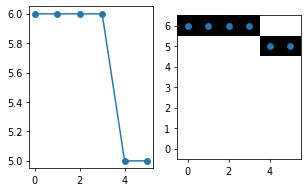

In [25]:
x1, y1 = 2, 2
x2, y2 = 8, 5
radius = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
print(radius)
x, y = midpoint(x1, y1, int(radius))
draw(x, y, log=True)

i think i should just provide raduis and tahe the center as (0,0)  
because during drawing we have to shift it to center .. then translate back to its original position

[0, 1, 2, 3, 4, 5]
[6, 6, 6, 6, 5, 5]


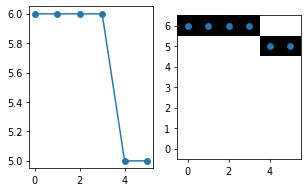

In [26]:
r = 6
x, y = midpoint(0, 0, r)
draw(x, y)

18 18
[-1, -2, -3, 5, 6, 7, 8, 9, 0, -1, -2, -3, 5, 6, 7, 8, 9, 0] [-1, -2, -3, 5, 6, 7, 8, 9, 0, -1, -2, -3, 5, 6, 7, 8, 9, 0]


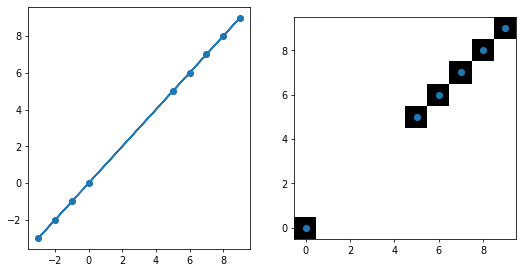

In [35]:
xall = x + y
yall = y + x
print(len(xall), len(yall))
print(xall, yall)
draw(xall, yall)

## Brasenhams Circle Drawing